In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df=pd.read_excel('diabetic.xlsx',header=None)
df.columns='A B C D E F G H I'.split()
df.head(3)

,A,B,C,D,E,F,G,H,I
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333,1


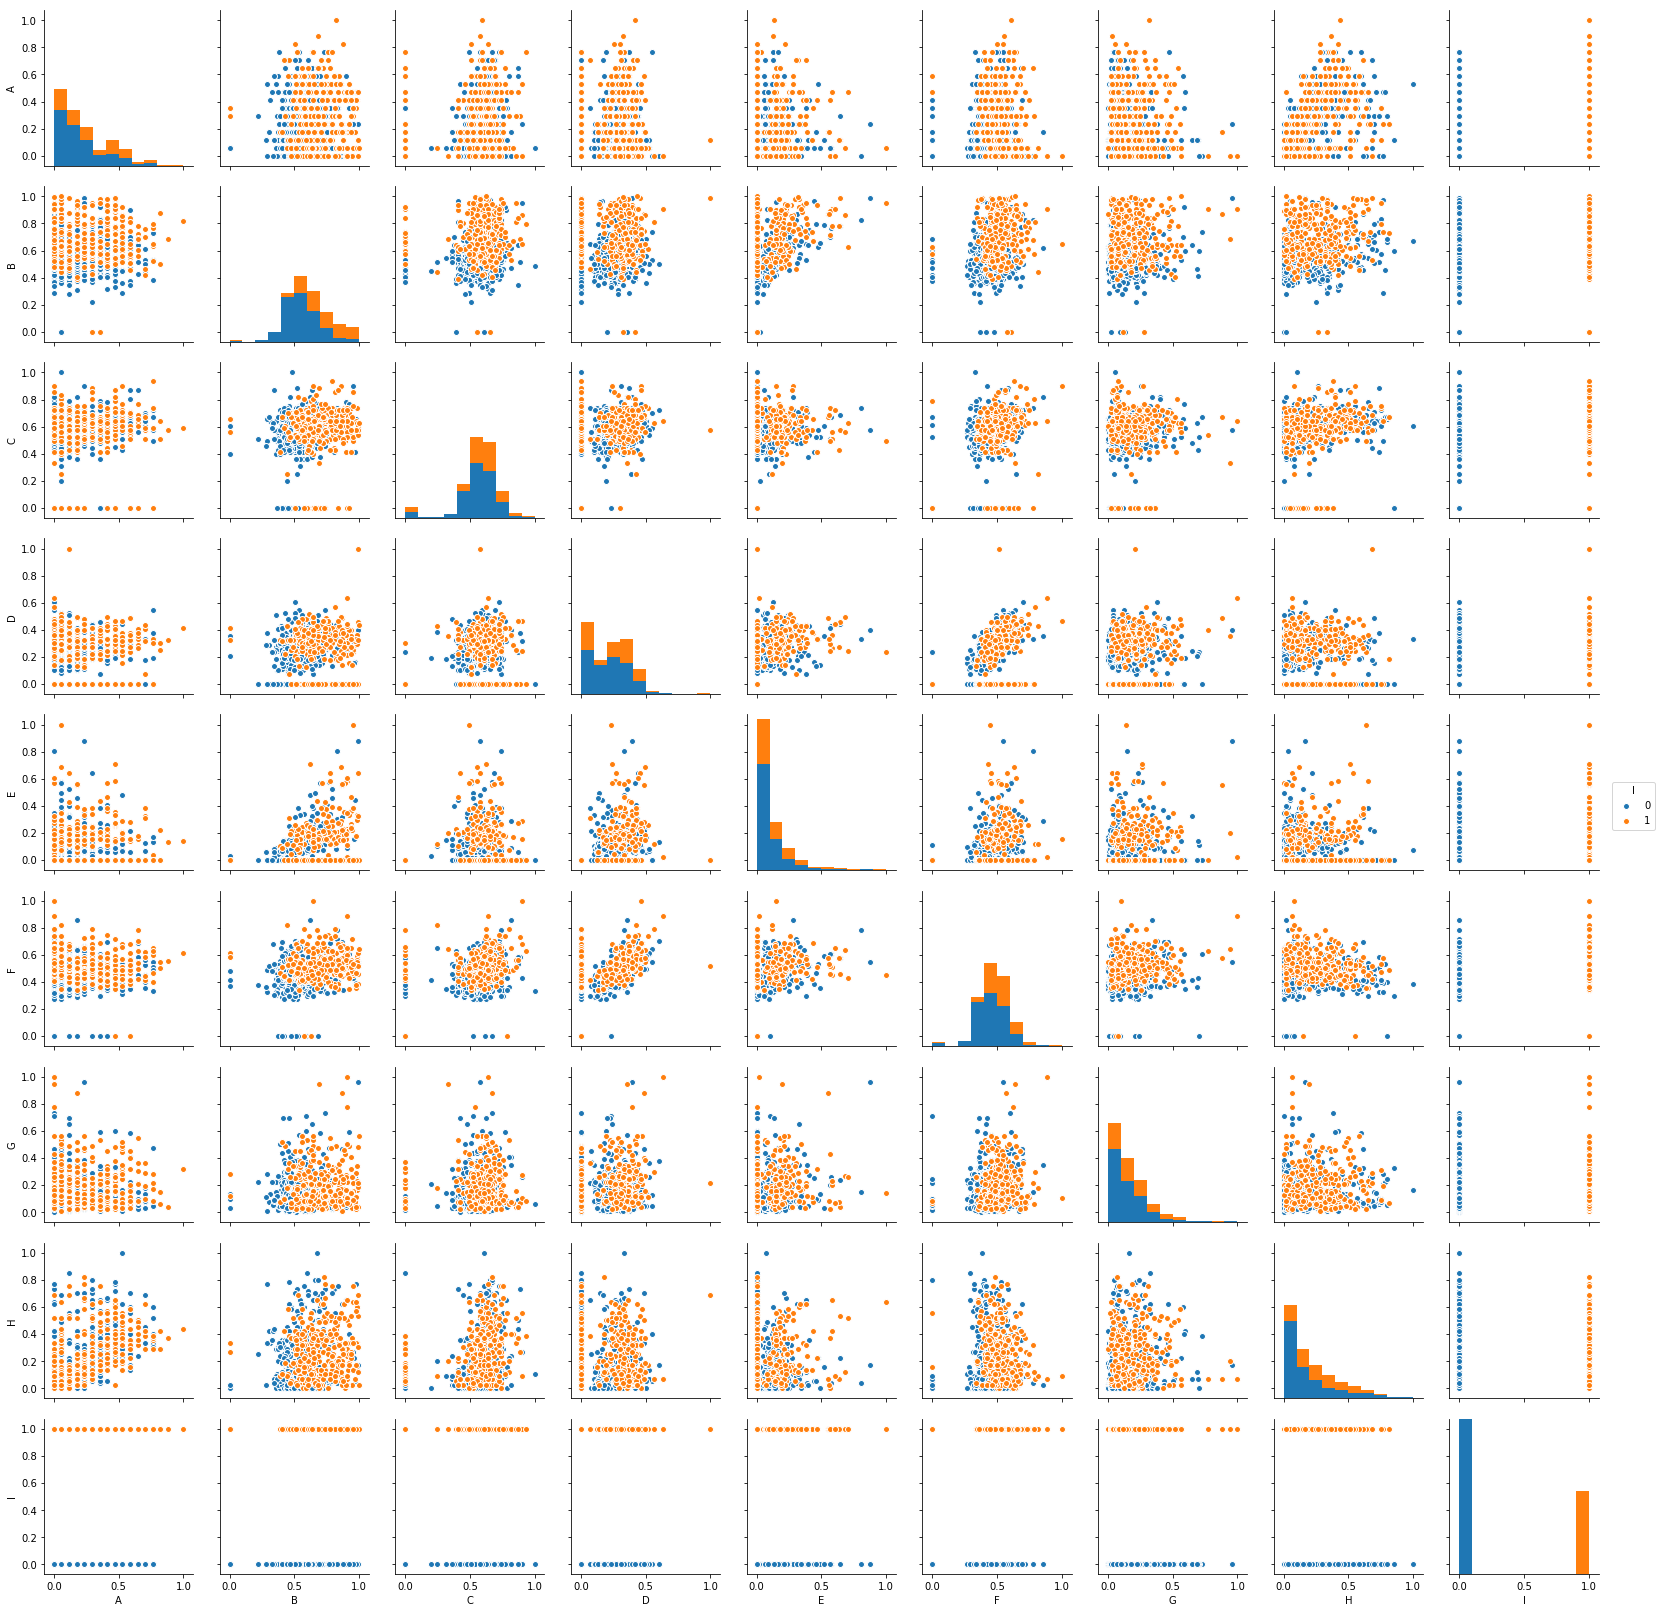

In [29]:
sns.pairplot(df,hue='I')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('A',axis=1), df['A'], test_size=0.33, random_state=42)

In [55]:
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,y_train)
prediction_with_label=RFR.predict(X_test)
RFR.fit(X_train.drop('I',axis=1),y_train)
prediction_without_label=RFR.predict(X_test.drop('I',axis=1))

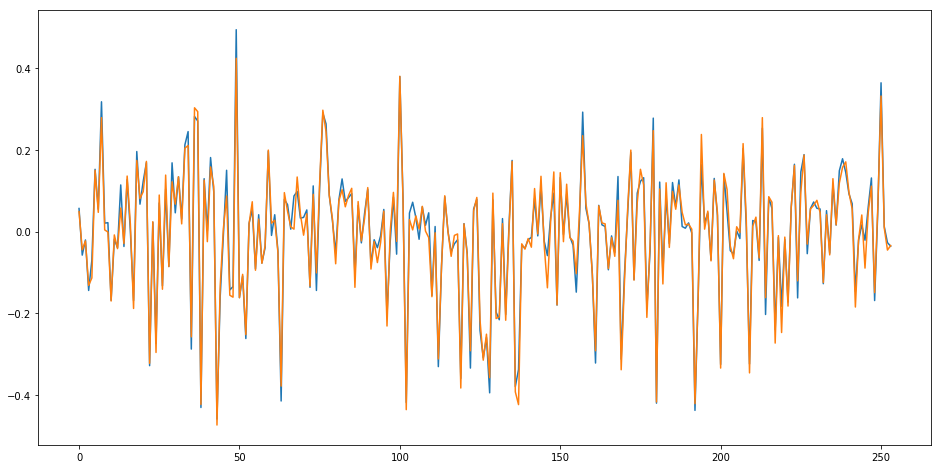

In [56]:
plt.figure(figsize=(16,8))
diff1=prediction_with_label-y_test
diff2=prediction_without_label-y_test
plt.plot(diff1.values)
plt.plot(diff2.values)